In [1]:
import sys
sys.path.insert(1, '/home/amalrajn/transformer_drought_prediction')
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from transformer_implementation import TransformerModel, train_model, evaluate_model
from data_handle import create_dataloader, process_spi_sti_data, SPIDataset
from torch.utils.data import DataLoader


In [2]:
wdir = "/home/amalrajn/transformer_drought_prediction"  # Set your data directory path
processed_data = process_spi_sti_data(wdir)

input_dim = processed_data.shape[1]
print(f"Input dimension (number of features): {input_dim}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model hyperparameters
input_dim = processed_data.shape[1]  # Adjust based on the number of features in your CSV
model_dim = 64
nhead = 8
num_encoder_layers = 3
num_decoder_layers = 3
dim_feedforward = 256
dropout = 0.1
num_epochs = 50
learning_rate = 0.001
batch_size = 32

Input dimension (number of features): 7466
Training with GPU


In [3]:
spi_dataset = SPIDataset(processed_data)
train_size = int(0.8 * len(spi_dataset))
val_size = int(0.1 * len(spi_dataset))
test_size = len(spi_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(spi_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(spi_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(spi_dataset, batch_size=batch_size, shuffle=True)  # Example validation loader
test_loader = DataLoader(spi_dataset, batch_size=batch_size, shuffle=True)  # Example test loader

/home/amalrajn/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Train Loss: 0.613525, Val Loss: 0.394449
Epoch 1 training time: 0 hours, 1 minutes, 4 seconds
Train F2 Score: 0.4883, Val F2 Score: 0.6404
Epoch 2/50, Train Loss: 0.354333, Val Loss: 0.306855
Epoch 2 training time: 0 hours, 1 minutes, 3 seconds
Train F2 Score: 0.6686, Val F2 Score: 0.7029
Epoch 3/50, Train Loss: 0.301434, Val Loss: 0.272739
Epoch 3 training time: 0 hours, 1 minutes, 3 seconds
Train F2 Score: 0.7072, Val F2 Score: 0.7259
Epoch 4/50, Train Loss: 0.266810, Val Loss: 0.234461
Epoch 4 training time: 0 hours, 1 minutes, 3 seconds
Train F2 Score: 0.7307, Val F2 Score: 0.7521
Epoch 5/50, Train Loss: 0.236113, Val Loss: 0.211924
Epoch 5 training time: 0 hours, 1 minutes, 3 seconds
Train F2 Score: 0.7526, Val F2 Score: 0.7703
Epoch 6/50, Train Loss: 0.217007, Val Loss: 0.196045
Epoch 6 training time: 0 hours, 1 minutes, 3 seconds
Train F2 Score: 0.7660, Val F2 Score: 0.7805
Epoch 7/50, Train Loss: 0.200117, Val Loss: 0.179625
Epoch 7 training time: 0 hours, 1 minutes

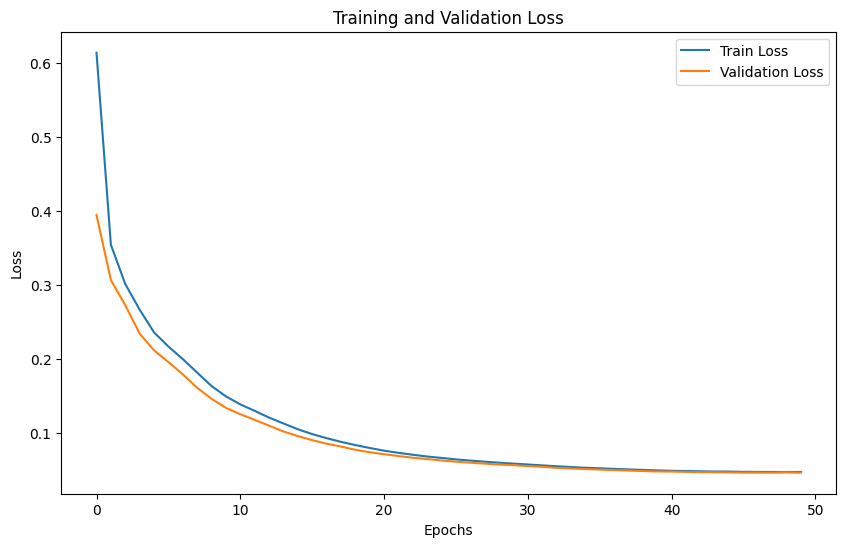

Training F2 Score: 0.9098, Recall: 0.9068, Precision: 0.9221
Validation F2 Score: 0.9107, Recall: 0.9076, Precision: 0.9235
Test Loss: 0.0467
Test F2 Score: 0.9107, Recall: 0.9076, Precision: 0.9235
Confusion Matrix:
[[15453559   542060]
 [  666206  6542503]]


In [4]:
# Initialize model
model = TransformerModel(input_dim, model_dim, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout).to(device)

# Train model
if device.type == "cuda":
    print("Training with GPU")
train_losses, val_losses, train_metrics, val_metrics = train_model(model, train_loader, val_loader, num_epochs, learning_rate, device)

# Evaluate model
test_loss, test_metrics = evaluate_model(model, test_loader, device)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Display training and validation metrics
print(f"Training F2 Score: {train_metrics['f2_score']:.4f}, Recall: {train_metrics['recall']:.4f}, Precision: {train_metrics['precision']:.4f}")
print(f"Validation F2 Score: {val_metrics['f2_score']:.4f}, Recall: {val_metrics['recall']:.4f}, Precision: {val_metrics['precision']:.4f}")

# Display test metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test F2 Score: {test_metrics['f2_score']:.4f}, Recall: {test_metrics['recall']:.4f}, Precision: {test_metrics['precision']:.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(test_metrics['confusion_matrix'])

# Save the trained model
torch.save(model.state_dict(), 'drought_prediction_model.pth')